In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('medical_examination.csv')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168     200    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            1     1      0   
3   3  17623       2     169     140    150    100            2     2      0   
4   4  17474       1     156      56    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       0  
2     0       0       0  
3     0       1       1  
4     0       0       0  


In [16]:
bmi = df['weight'] / ((df['height'] *100) ** 2)
df['overweight'] = (bmi>25).astype(int)

print(df['overweight'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: overweight, dtype: int32


In [19]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
print(df['cholesterol'])

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     1
9     0
10    1
11    0
Name: cholesterol, dtype: int32


In [22]:
df['gluc']

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    0
Name: gluc, dtype: int32

In [ ]:
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


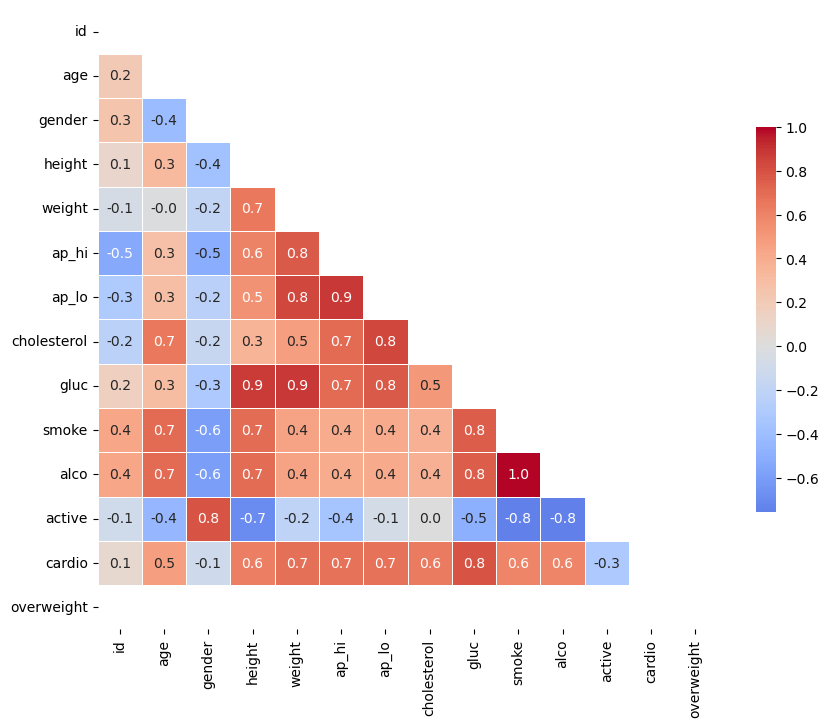

In [27]:
# 9. Draw Heat Map
def draw_heat_map():
    # 10. Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # 11. Calculate the correlation matrix
    corr = df_heat.corr()

    # 12. Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 13. Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # 14. Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

    return fig

heat_map_fig = draw_heat_map()
heat_map_fig.savefig('heatmap.png')